In [2]:

dataset_name = "TNBC"
path_to_hdf5 = f"../../results/{dataset_name}/compute_patches/all/patches.hdf5"
path_to_invasive_hdf5 = f"../../results/{dataset_name}/compute_patches/invasive/patches.hdf5"


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import gzip 
import pickle

with gzip.open("../../results/TNBC/compute_patches/all/patches_info.pkl.gz") as f:
    patches_info = pickle.load(f)

In [5]:
# Load spots labels

labels = pd.read_csv("../../results/TNBC/compute_patches/all/spots_labels.csv", index_col=0)

In [77]:
labels

x   y  new_x  new_y      pixel_x       pixel_y  selected  \
TNBC1_spot10x14  10  14  10.03  13.99  7747.000000   5889.000000         1   
TNBC1_spot10x16  10  16  10.03  16.03  7747.666667   6704.666667         1   
TNBC1_spot10x18  10  18  10.01  18.00  7737.666667   7497.000000         1   
TNBC1_spot10x20  10  20  10.03  20.00  7747.333333   8298.000000         1   
TNBC1_spot10x22  10  22  10.01  22.00  7738.666667   9101.000000         1   
...              ..  ..    ...    ...          ...           ...       ...   
TNBC96_spot9x45   9  45   9.03  45.04  7271.333333  21499.666667         1   
TNBC96_spot9x47   9  47   8.99  47.03  7258.000000  22299.666667         1   
TNBC96_spot9x49   9  49   8.99  49.04  7257.333333  23104.333333         1   
TNBC96_spot9x51   9  51   9.01  51.03  7263.333333  23902.666667         1   
TNBC96_spot9x53   9  53   9.01  53.04  7263.666667  24707.000000         1   

                Necrosis Heterologous elements            label  
TNBC1_spot10x14      0.0                   0.0   adipose tissue  
TNBC1_spot10x16      0.0                   0.0   adipose tissue  
TNBC1_spot10x18      0.0                   0.0   adipose tissue  
TNBC1_spot10x20      0.0                   0.0     undetermined  
TNBC1_spot10x22      0.0                   0.0     undetermined  
...                  ...                   ...              ...  
TNBC96_spot9x45      0.0                   0.0  invasive cancer  
TNBC96_spot9x47      0.0                   0.0  invasive cancer  
TNBC96_spot9x49      0.0                   0.0  invasive cancer  
TNBC96_spot9x51      0.0                   0.0  invasive cancer  
TNBC96_spot9x53      0.0                   0.0     undetermined  

[101954 rows x 10 columns]

In [78]:
spot_name = "TNBC49_spot29x39"

In [79]:
labels.loc[spot_name]

x                                  29
y                                  39
new_x                            28.7
new_y                           38.99
pixel_x                  15220.666667
pixel_y                  18818.333333
selected                            1
Necrosis                          1.0
Heterologous elements             0.0
label                    undetermined
Name: TNBC49_spot29x39, dtype: object

In [80]:
info_patch = [patch for patch in patches_info if spot_name in patch["name"]][0]
slide_name = info_patch["path_origin"].split("/")[-1].split(".")[0]


In [81]:
annotated_slide = f"/storage/research/dbmr_luisierlab/database/ST_TNBC_v3/Images/imageAnnotations/{slide_name}.png"
slide = f"/storage/research/dbmr_luisierlab/database/ST_TNBC_v3/Images/imagesLarge/{slide_name}.jpg"
slide_hd = f"/storage/research/dbmr_luisierlab/database/ST_TNBC_v3/Images/imagesHD/{slide_name}.jpg"

In [82]:

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

img = Image.open(slide)
annotated = Image.open(annotated_slide).convert("RGB")
# img_hd = Image.open(slide_hd)

In [83]:
factor = 10 / 3

In [84]:
patch_low_res_x = info_patch["start_width_origin"] / factor
patch_low_res_y = info_patch["start_height_origin"] / factor
patch_size = int(252 / factor)

Text(0.5, 0.98, 'TNBC49_spot29x39')

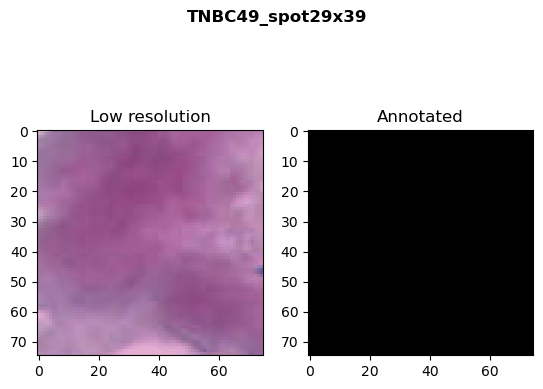

In [85]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
# plt.subplot(1, 3, 1)
# img_arr = np.array(img_hd)
# # Calculate crop indices
# x_start = int(info_patch["start_width_origin"])
# y_start = int(info_patch["start_height_origin"])
# x_end = x_start + 252
# y_end = y_start + 252

# # Use numpy slicing to extract the region
# cropped_arr = img_arr[y_start:y_end, x_start:x_end]
# plt.imshow(cropped_arr)
# plt.title("High resolution")

plt.subplot(1, 2, 1)
img_arr = np.array(img)
# Calculate crop indices
x_start = int(patch_low_res_x)
y_start = int(patch_low_res_y)
x_end = x_start + patch_size
y_end = y_start + patch_size
plt.title("Low resolution")

# Use numpy slicing to extract the region
cropped_arr = img_arr[y_start:y_end, x_start:x_end]
plt.imshow(cropped_arr)

plt.subplot(1, 2, 2)
img_arr = np.array(annotated)
# Calculate crop indices
x_start = int(patch_low_res_x)
y_start = int(patch_low_res_y)
x_end = x_start + patch_size
y_end = y_start + patch_size
plt.title("Annotated")

# Use numpy slicing to extract the region
cropped_arr = img_arr[y_start:y_end, x_start:x_end]
plt.imshow(cropped_arr)
plt.suptitle(spot_name, weight="bold")


In [14]:
cropped_arr

array([[[233, 233,   0],
        [233, 233,   0],
        [233, 233,   0],
        ...,
        [233, 233,   0],
        [233, 233,   0],
        [233, 233,   0]],

       [[233, 233,   0],
        [233, 233,   0],
        [233, 233,   0],
        ...,
        [233, 233,   0],
        [233, 233,   0],
        [233, 233,   0]],

       [[233, 233,   0],
        [233, 233,   0],
        [233, 233,   0],
        ...,
        [233, 233,   0],
        [233, 233,   0],
        [233, 233,   0]],

       ...,

       [[233, 233,   0],
        [233, 233,   0],
        [233, 233,   0],
        ...,
        [233, 233,   0],
        [233, 233,   0],
        [233, 233,   0]],

       [[233, 233,   0],
        [233, 233,   0],
        [233, 233,   0],
        ...,
        [233, 233,   0],
        [233, 233,   0],
        [233, 233,   0]],

       [[233, 233,   0],
        [233, 233,   0],
        [233, 233,   0],
        ...,
        [233, 233,   0],
        [233, 233,   0],
        [233, 233,   0]]

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


def get_all_dataset_paths(h5file):
    """Recursively get all dataset paths in the HDF5 file."""
    paths = []
    def visitor(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5file.visititems(visitor)
    return paths



In [16]:
labels.index

Index(['TNBC1_spot10x14', 'TNBC1_spot10x16', 'TNBC1_spot10x18',
       'TNBC1_spot10x20', 'TNBC1_spot10x22', 'TNBC1_spot10x24',
       'TNBC1_spot10x26', 'TNBC1_spot10x28', 'TNBC1_spot10x30',
       'TNBC1_spot10x32',
       ...
       'TNBC96_spot9x35', 'TNBC96_spot9x37', 'TNBC96_spot9x39',
       'TNBC96_spot9x41', 'TNBC96_spot9x43', 'TNBC96_spot9x45',
       'TNBC96_spot9x47', 'TNBC96_spot9x49', 'TNBC96_spot9x51',
       'TNBC96_spot9x53'],
      dtype='object', length=101954)

Found datasets: ['TNBC11_CN6_C1_patch004', 'TNBC11_CN6_C1_patch010', 'TNBC11_CN6_C1_patch012', 'TNBC11_CN6_C1_patch013', 'TNBC11_CN6_C1_patch019', 'TNBC11_CN6_C1_patch027', 'TNBC11_CN6_C1_patch037', 'TNBC11_CN6_C1_patch047', 'TNBC11_CN6_C1_patch054', 'TNBC11_CN6_C1_patch056', 'TNBC11_CN6_C1_patch061', 'TNBC11_CN6_C1_patch066', 'TNBC11_CN6_C1_patch067', 'TNBC11_CN6_C1_patch070', 'TNBC11_CN6_C1_patch072', 'TNBC11_CN6_C1_patch074', 'TNBC11_CN6_C1_patch078', 'TNBC11_CN6_C1_patch082', 'TNBC11_CN6_C1_patch086', 'TNBC11_CN6_C1_patch095', 'TNBC11_CN6_C1_patch102', 'TNBC11_CN6_C1_patch109', 'TNBC11_CN6_C1_patch113', 'TNBC11_CN6_C1_patch114', 'TNBC11_CN6_C1_patch119', 'TNBC11_CN6_C1_patch121', 'TNBC11_CN6_C1_patch127', 'TNBC11_CN6_C1_patch130', 'TNBC11_CN6_C1_patch131', 'TNBC11_CN6_C1_patch142', 'TNBC11_CN6_C1_patch149', 'TNBC11_CN6_C1_patch151', 'TNBC11_CN6_C1_patch168', 'TNBC11_CN6_C1_patch173', 'TNBC11_CN6_C1_patch178', 'TNBC11_CN6_C1_patch181', 'TNBC11_CN6_C1_patch184', 'TNBC11_CN6_C1_patch1

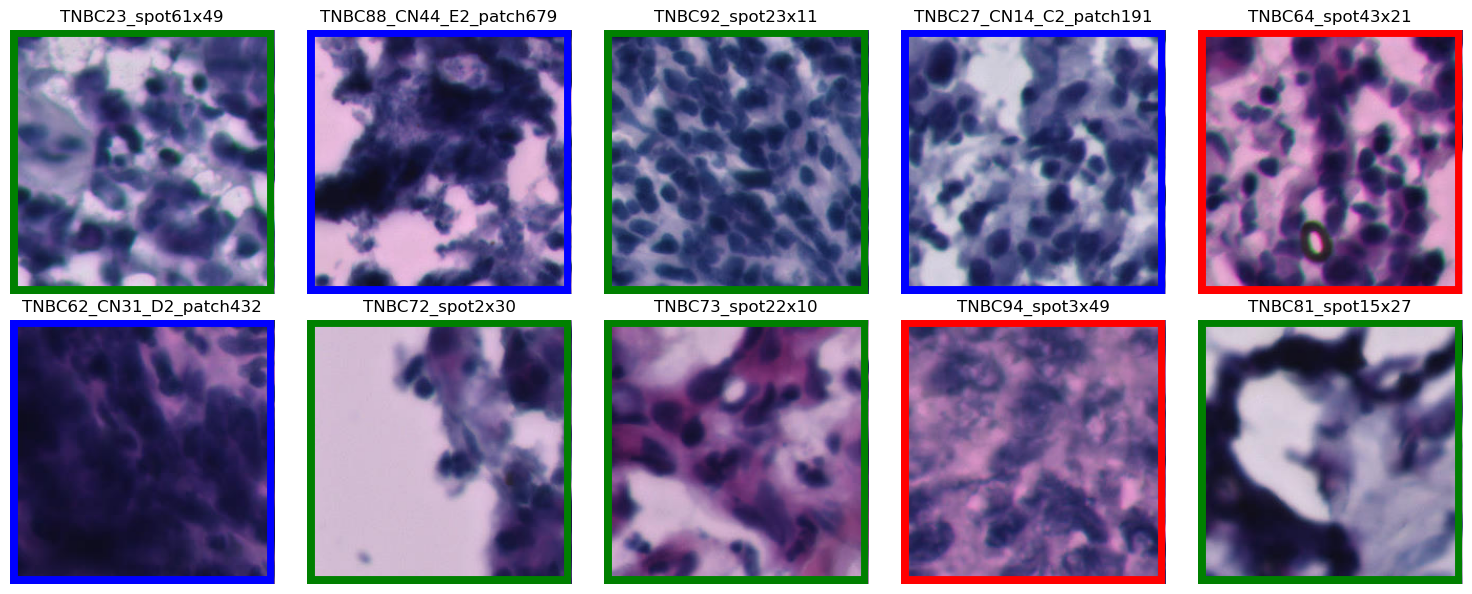

In [19]:

with h5py.File(path_to_invasive_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    print("Found datasets:", dataset_paths)
    chosen = np.random.choice(dataset_paths, size=10, replace=False)
    plt.figure(figsize=(15, 6))
    for i, ds_path in enumerate(chosen):
        data = f[ds_path][()]
        # If the image is grayscale, add cmap='gray'
        plt.subplot(2, 5, i + 1)
        if data.ndim == 2:
            plt.imshow(data, cmap='gray')
        else:
            plt.imshow(data.astype(np.uint8))
        plt.axis('off')
        plt.title(ds_path)
        # Draw a red rectangle around the border of the image
        ax = plt.gca()
        height, width = data.shape[:2]
        if ds_path in labels.index:
            if labels.loc[ds_path]["label"] == "undetermined":
                rect = plt.Rectangle((0, 0), width-1, height-1, linewidth=10, edgecolor='green', facecolor='none')
            elif labels.loc[ds_path]["label"] == "invasive cancer":
                rect = plt.Rectangle((0, 0), width-1, height-1, linewidth=10, edgecolor='red', facecolor='none')
            else:
                rect = plt.Rectangle((0, 0), width-1, height-1, linewidth=10, edgecolor='black', facecolor='none')
        else:
            rect = plt.Rectangle((0, 0), width-1, height-1, linewidth=10, edgecolor='blue', facecolor='none')
        ax.add_patch(rect)
    plt.tight_layout()
    plt.show()

Found datasets: ['TNBC11_CN6_C1_patch004', 'TNBC11_CN6_C1_patch010', 'TNBC11_CN6_C1_patch012', 'TNBC11_CN6_C1_patch013', 'TNBC11_CN6_C1_patch019', 'TNBC11_CN6_C1_patch027', 'TNBC11_CN6_C1_patch037', 'TNBC11_CN6_C1_patch047', 'TNBC11_CN6_C1_patch054', 'TNBC11_CN6_C1_patch056', 'TNBC11_CN6_C1_patch061', 'TNBC11_CN6_C1_patch066', 'TNBC11_CN6_C1_patch067', 'TNBC11_CN6_C1_patch070', 'TNBC11_CN6_C1_patch072', 'TNBC11_CN6_C1_patch074', 'TNBC11_CN6_C1_patch078', 'TNBC11_CN6_C1_patch082', 'TNBC11_CN6_C1_patch086', 'TNBC11_CN6_C1_patch095', 'TNBC11_CN6_C1_patch102', 'TNBC11_CN6_C1_patch109', 'TNBC11_CN6_C1_patch113', 'TNBC11_CN6_C1_patch114', 'TNBC11_CN6_C1_patch119', 'TNBC11_CN6_C1_patch121', 'TNBC11_CN6_C1_patch127', 'TNBC11_CN6_C1_patch130', 'TNBC11_CN6_C1_patch131', 'TNBC11_CN6_C1_patch142', 'TNBC11_CN6_C1_patch149', 'TNBC11_CN6_C1_patch151', 'TNBC11_CN6_C1_patch168', 'TNBC11_CN6_C1_patch173', 'TNBC11_CN6_C1_patch178', 'TNBC11_CN6_C1_patch181', 'TNBC11_CN6_C1_patch184', 'TNBC11_CN6_C1_patch1

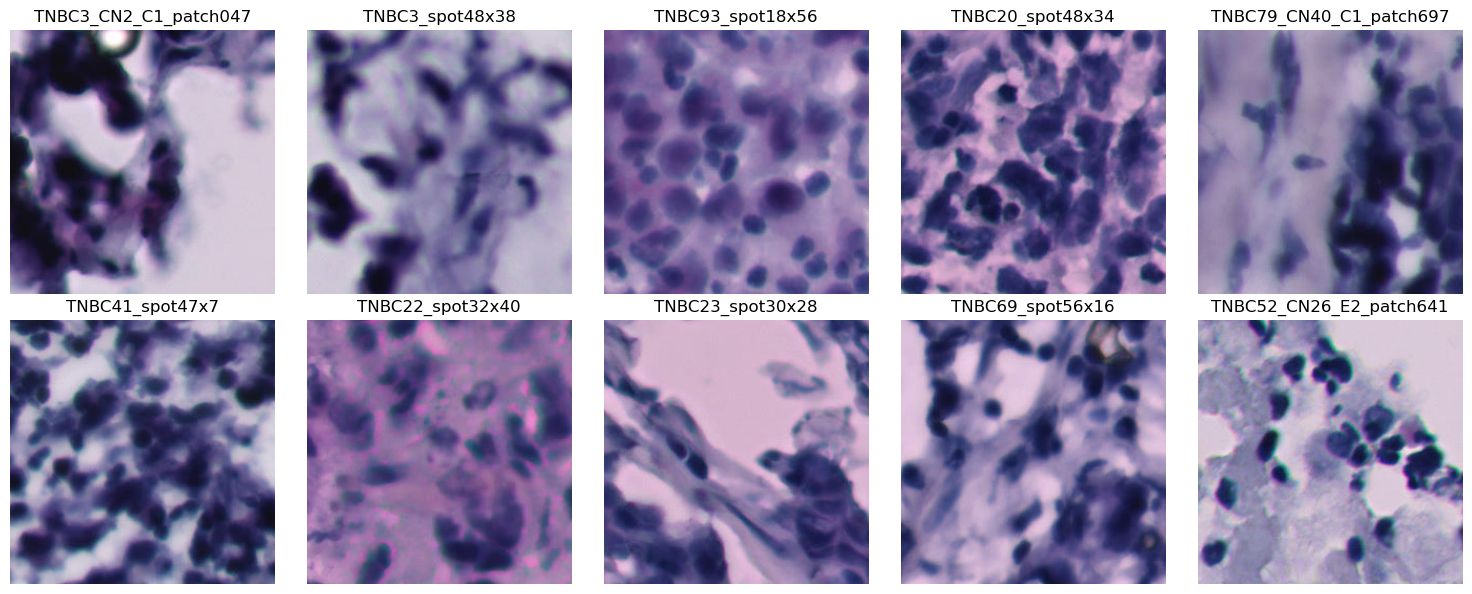

In [5]:

with h5py.File(path_to_invasive_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    print("Found datasets:", dataset_paths)
    chosen = np.random.choice(dataset_paths, size=10, replace=False)
    plt.figure(figsize=(15, 6))
    for i, ds_path in enumerate(chosen):
        data = f[ds_path][()]
        # If the image is grayscale, add cmap='gray'
        plt.subplot(2, 5, i + 1)
        if data.ndim == 2:
            plt.imshow(data, cmap='gray')
        else:
            plt.imshow(data.astype(np.uint8))
        plt.axis('off')
        plt.title(ds_path)
    plt.tight_layout()
    plt.show()

Found datasets: ['TNBC11_CN6_C1_patch004', 'TNBC11_CN6_C1_patch010', 'TNBC11_CN6_C1_patch012', 'TNBC11_CN6_C1_patch013', 'TNBC11_CN6_C1_patch019', 'TNBC11_CN6_C1_patch027', 'TNBC11_CN6_C1_patch037', 'TNBC11_CN6_C1_patch047', 'TNBC11_CN6_C1_patch054', 'TNBC11_CN6_C1_patch056', 'TNBC11_CN6_C1_patch061', 'TNBC11_CN6_C1_patch066', 'TNBC11_CN6_C1_patch067', 'TNBC11_CN6_C1_patch070', 'TNBC11_CN6_C1_patch072', 'TNBC11_CN6_C1_patch074', 'TNBC11_CN6_C1_patch078', 'TNBC11_CN6_C1_patch082', 'TNBC11_CN6_C1_patch086', 'TNBC11_CN6_C1_patch095', 'TNBC11_CN6_C1_patch102', 'TNBC11_CN6_C1_patch109', 'TNBC11_CN6_C1_patch113', 'TNBC11_CN6_C1_patch114', 'TNBC11_CN6_C1_patch119', 'TNBC11_CN6_C1_patch121', 'TNBC11_CN6_C1_patch127', 'TNBC11_CN6_C1_patch130', 'TNBC11_CN6_C1_patch131', 'TNBC11_CN6_C1_patch142', 'TNBC11_CN6_C1_patch149', 'TNBC11_CN6_C1_patch151', 'TNBC11_CN6_C1_patch168', 'TNBC11_CN6_C1_patch173', 'TNBC11_CN6_C1_patch178', 'TNBC11_CN6_C1_patch181', 'TNBC11_CN6_C1_patch184', 'TNBC11_CN6_C1_patch1

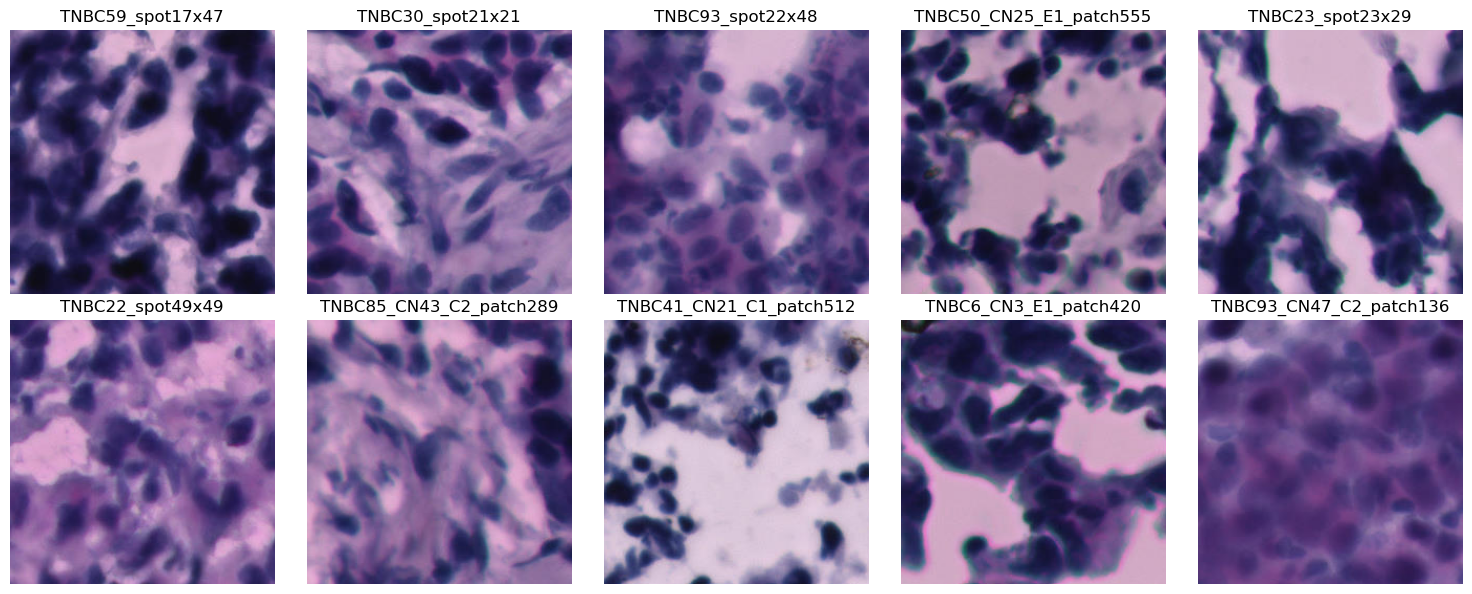

In [9]:
with h5py.File(path_to_invasive_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    print("Found datasets:", dataset_paths)
    chosen = np.random.choice(dataset_paths, size=10, replace=False)
    plt.figure(figsize=(15, 6))
    for i, ds_path in enumerate(chosen):
        data = f[ds_path][()]
        # If the image is grayscale, add cmap='gray'
        plt.subplot(2, 5, i + 1)
        if data.ndim == 2:
            plt.imshow(data, cmap='gray')
        else:
            plt.imshow(data.astype(np.uint8))
        plt.axis('off')
        plt.title(ds_path)
    plt.tight_layout()
    plt.show()

In [6]:
import seaborn as sns
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [24]:
from skimage.measure import shannon_entropy


In [25]:
entropies = []

with h5py.File(path_to_hdf5, "r") as f:
    dataset_paths = get_all_dataset_paths(f)
    
    # sample randomly 50'000 datasets
    dataset_paths = np.random.choice(dataset_paths, size=50000, replace=False)
    
    for ds_path in dataset_paths:
        data = f[ds_path][()]
        ent = shannon_entropy(data)
        entropies.append(ent)


In [26]:
len(entropies)

50000

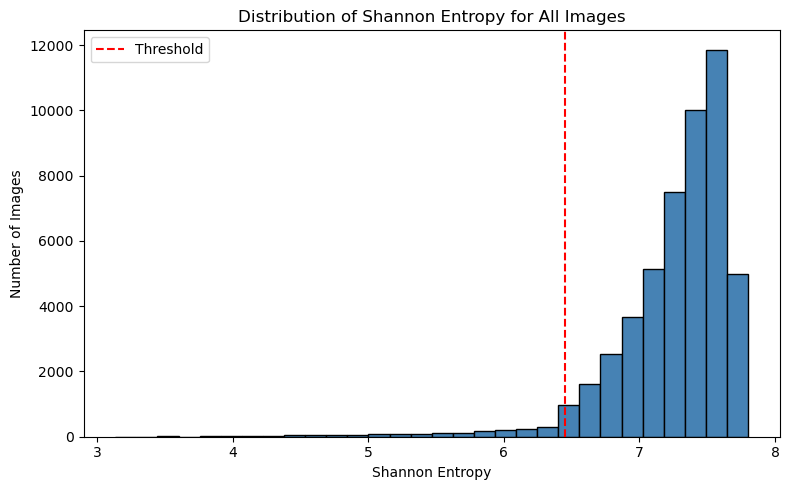

In [27]:

# Plot the entropy distribution
plt.figure(figsize=(8, 5))
plt.hist(entropies, bins=30, color='steelblue', edgecolor='black')
plt.xlabel("Shannon Entropy")
plt.ylabel("Number of Images")
plt.title("Distribution of Shannon Entropy for All Images")
plt.tight_layout()
SHANNON_ENTROPY_THRESHOLD_1 = 6.451
SHANNON_ENTROPY_THRESHOLD_2 = 5.5

plt.axvline(SHANNON_ENTROPY_THRESHOLD_1, color='red', linestyle='--', label='Threshold')
# plt.axvline(SHANNON_ENTROPY_THRESHOLD_2, color='orange', linestyle='--', label='Threshold 2')
plt.legend()
plt.show()

## HER2

In [18]:
dataset_name = "her2_final_without_A"
path_to_patches = f"/idiap/group/genomics/lfournier/digitalhistopathology/results/compute_patches/{dataset_name}"

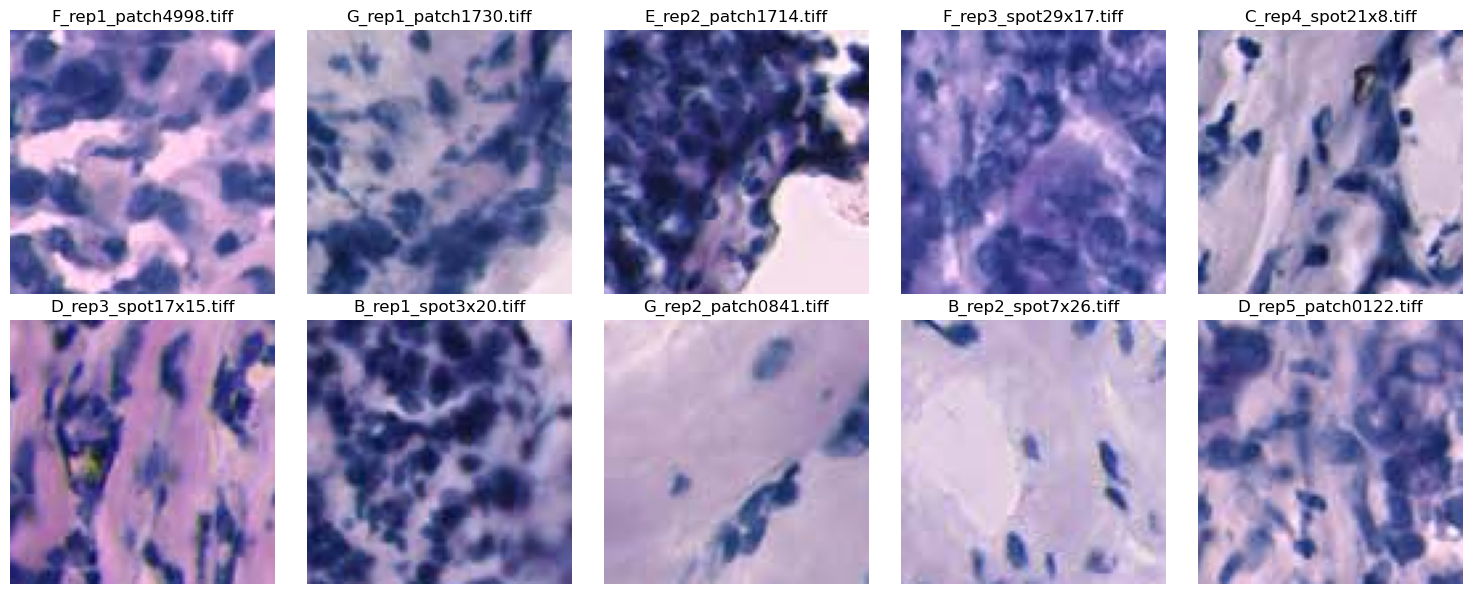

In [19]:
import os
from PIL import Image

# List all .tiff files in the directory
tiff_files = [f for f in os.listdir(path_to_patches) if f.lower().endswith('.tiff')]

# Randomly select 10 files
chosen_files = np.random.choice(tiff_files, size=10, replace=False)

plt.figure(figsize=(15, 6))
for i, fname in enumerate(chosen_files):
    img_path = os.path.join(path_to_patches, fname)
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(fname)
plt.tight_layout()
plt.show()